# 1: Importing Libraries and Dataset

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

dataset = pd.read_excel("HousePricePrediction.xlsx")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
dataset.shape

(2919, 13)

# 2: Data Preprocessing

In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


# 3: Exploratory Data Analysis

<Axes: >

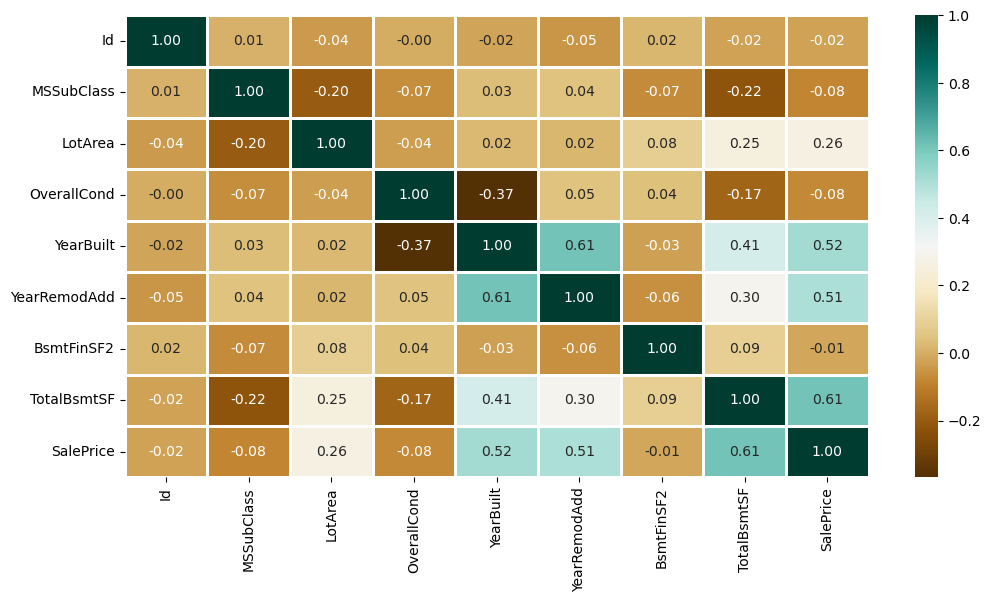

In [6]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

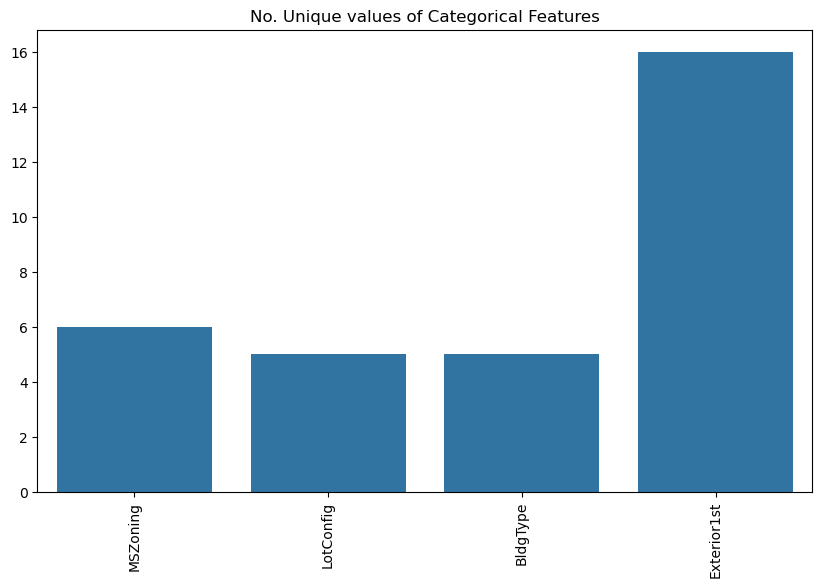

In [8]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

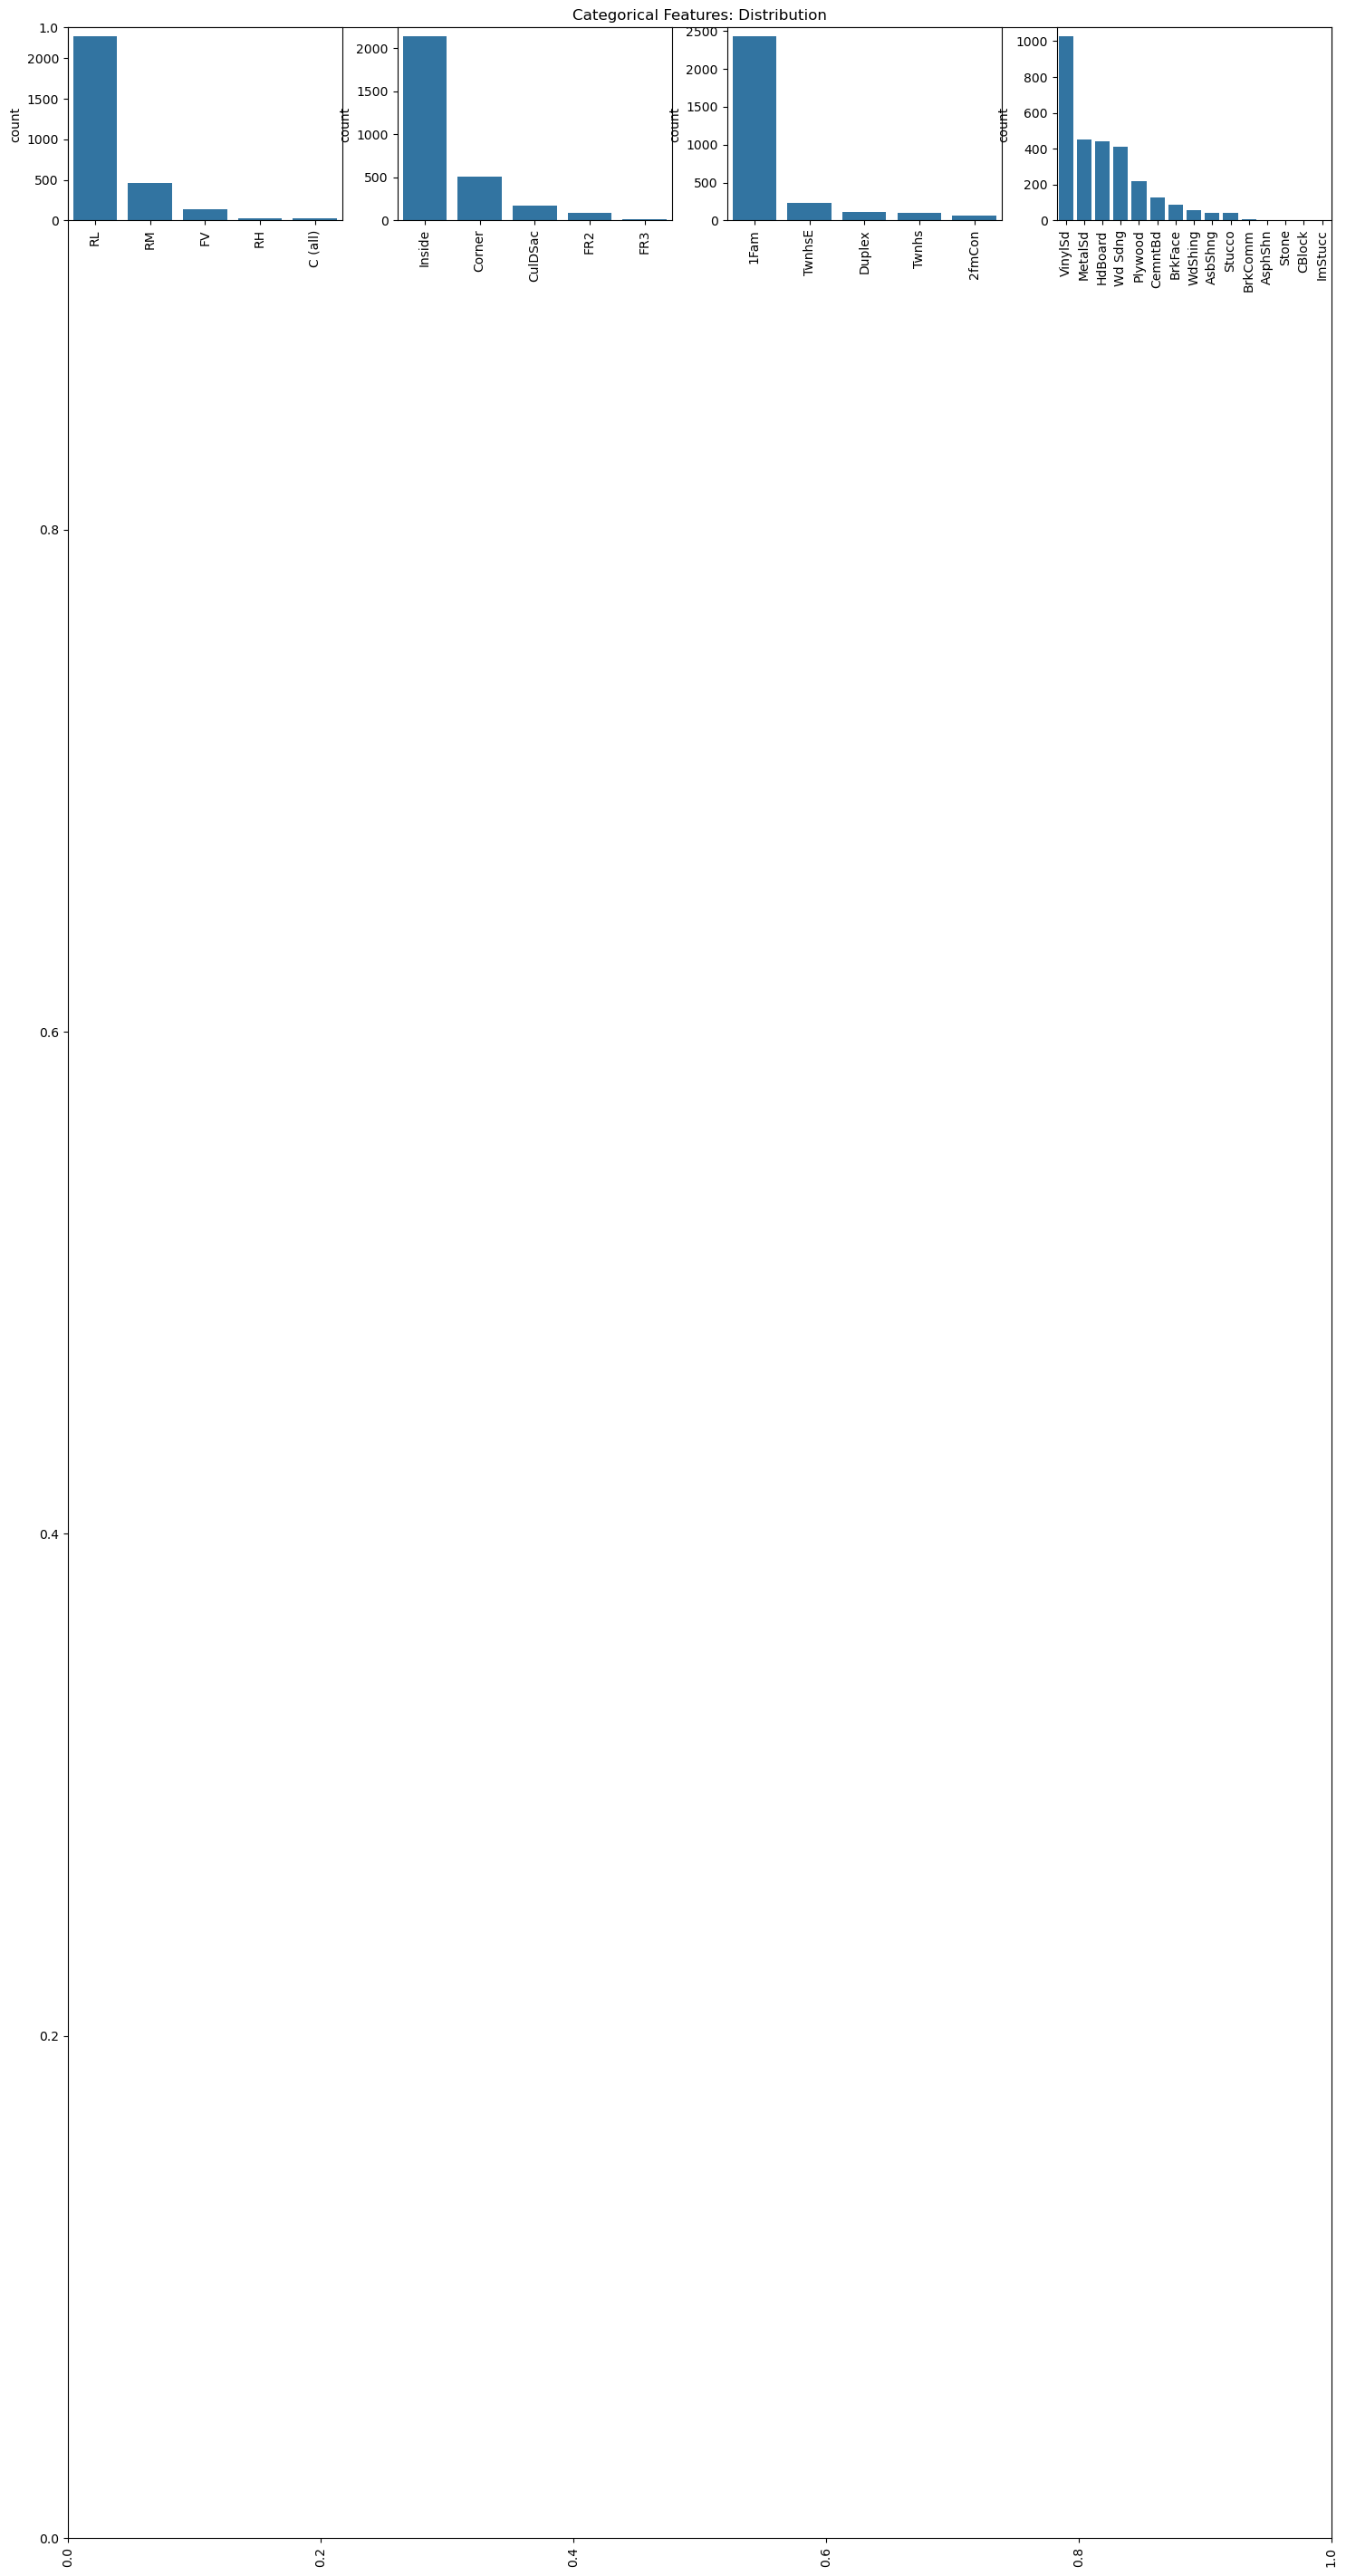

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

C:\Users\S.SARKAR\AppData\Local\Temp\ipykernel_15992\2821910867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y.values, ax=axes[row][col_pos], palette='Set2')
C:\Users\S.SARKAR\AppData\Local\Temp\ipykernel_15992\2821910867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y.values, ax=axes[row][col_pos], palette='Set2')
C:\Users\S.SARKAR\AppData\Local\Temp\ipykernel_15992\2821910867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y.values, ax=axes[row][col_pos], palette=

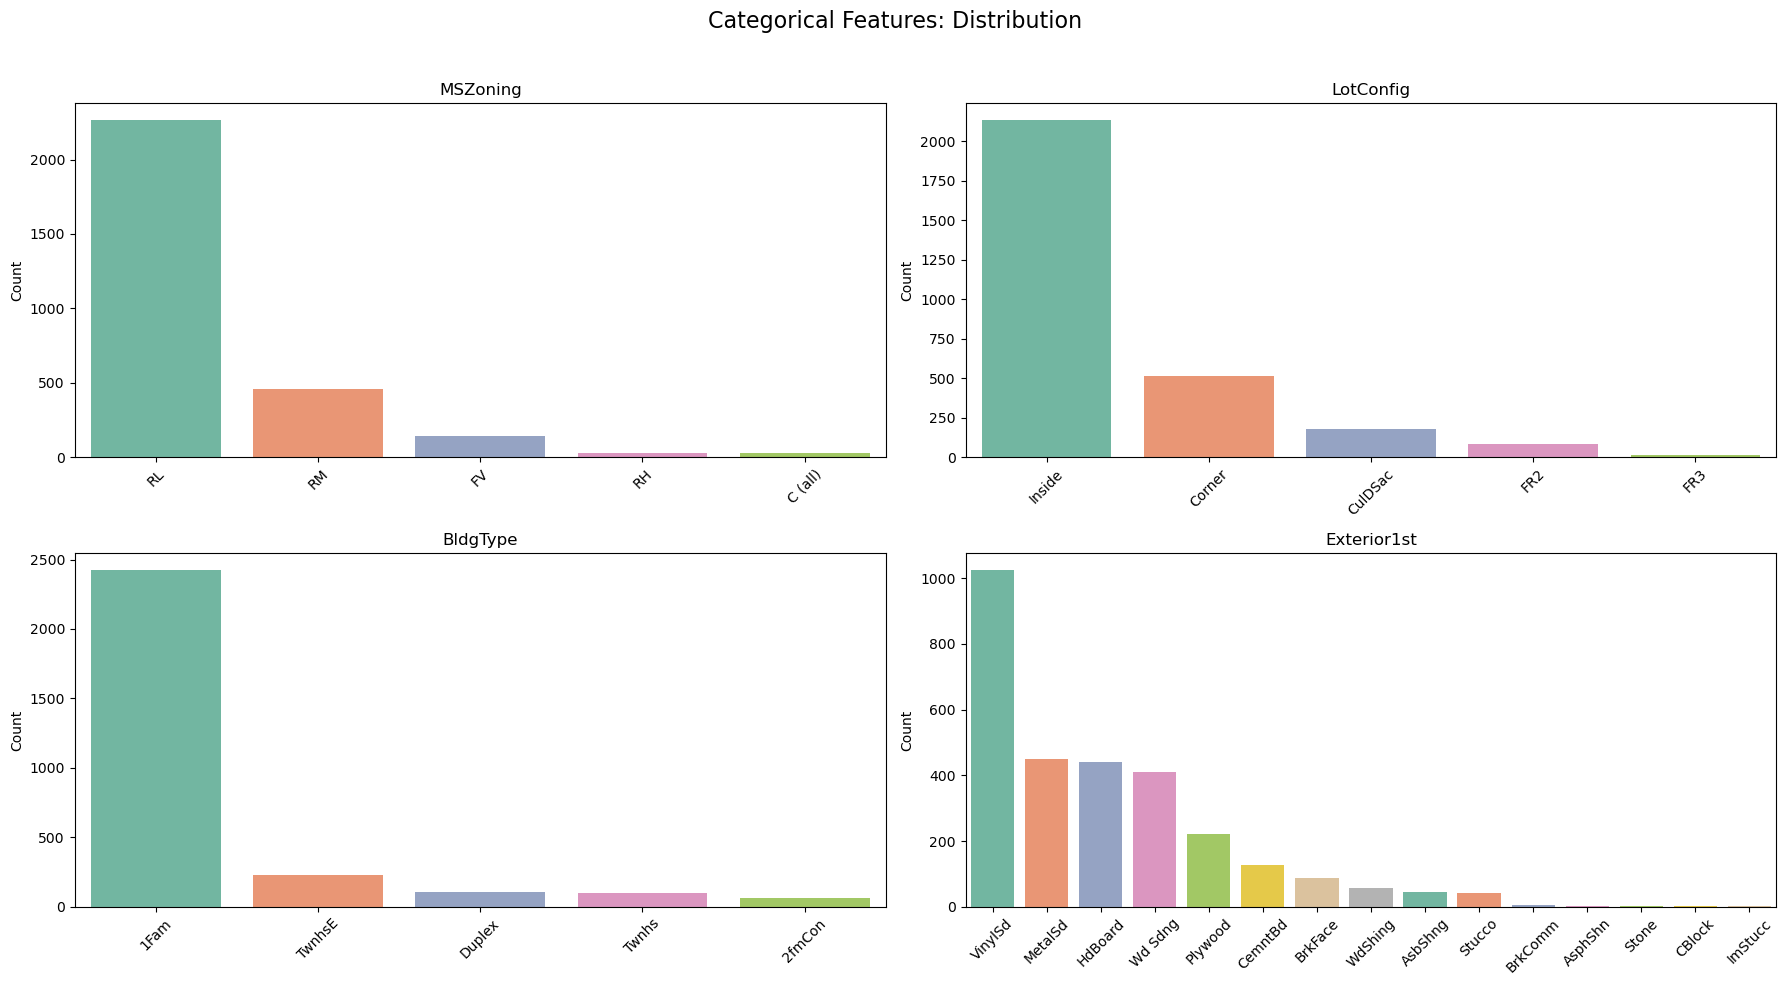

In [36]:
# Split the categorical columns into groups of 4
batch_size = 4
num_plots = len(object_cols)
batches = math.ceil(num_plots / batch_size)

for i in range(batches):
    fig, axes = plt.subplots(2, 2, figsize=(18, 10))
    fig.suptitle(f'Categorical Features: Distribution', fontsize=16)
    
    for j in range(batch_size):
        col_index = i * batch_size + j
        if col_index >= num_plots:
            break
        
        col = object_cols[col_index]
        y = dataset[col].value_counts()
        
        row = j // 2
        col_pos = j % 2
        
        sns.barplot(x=list(y.index), y=y.values, ax=axes[row][col_pos], palette='Set2')
        axes[row][col_pos].set_title(col)
        axes[row][col_pos].tick_params(axis='x', rotation=45)
        axes[row][col_pos].set_ylabel('Count')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust layout to leave space for suptitle
    plt.show()

# 4: Data Cleaning

In [10]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [11]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 

In [12]:
new_dataset = dataset.dropna()

In [13]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# 5: OneHotEncoder – For Label categorical features

In [15]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [16]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# 6: Splitting Dataset into Training and Testing

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# 7: Model Training and Accuracy

In [18]:
# SVM – Support vector Machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [19]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.18603494401728518

In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841600076


# 8: Model Comparison 

In [28]:
styled_table = comparison_df.style.highlight_max(color='lightgreen', axis=0)
styled_table

,Model,R2 Score
0,SVM,0.187100
1,Random Forest Regression,0.186000
2,Linear Regression,0.187400


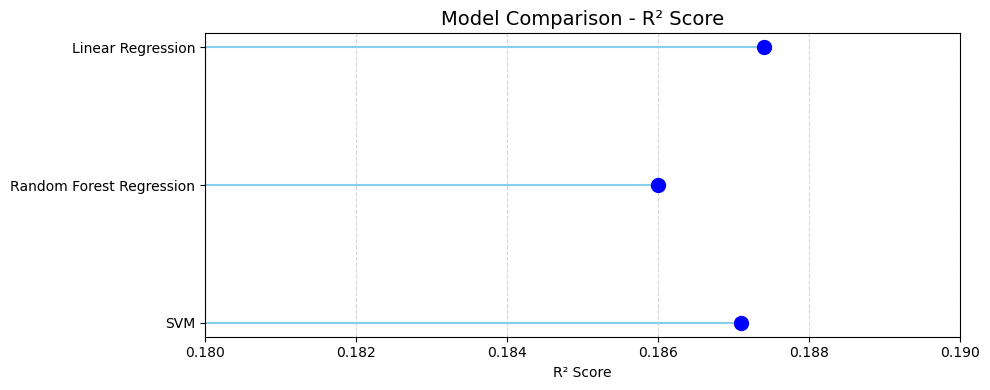

In [29]:
plt.figure(figsize=(10, 4))
plt.hlines(y=comparison_df['Model'], xmin=0, xmax=comparison_df['R2 Score'], color='skyblue')
plt.plot(comparison_df['R2 Score'], comparison_df['Model'], "o", markersize=10, color='blue')
plt.title('Model Comparison - R² Score', fontsize=14)
plt.xlabel('R² Score')
plt.xlim(0.18, 0.19)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()